# **MBPO Simulation**

----

In [ ]:
# Forza l'ambiente corretto per CityLearn e Hydra su Colab
!pip uninstall -y numpy tensorboard tensorflow
!pip install numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install tensorboard==2.12.3
!pip install hydra-core
!pip install citylearn
!pip install omegaconf
!pip install colorednoise
!pip install mujoco

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 118.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 40.6 MB/s eta 0:00:0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.5/379.5 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


**Import list**

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/src')

from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import *
from citylearn.wrappers import *

# Data structure import
import pandas as pd
from datetime import datetime

# Plot import
from IPython.display import display, Markdown
from utils import plotting_functions as plt

# import for using model-based agents
# initialize Hydra in programmatic mode
from hydra import initialize, compose
import numpy as np
import omegaconf
import torch

# Work directory setter
import os, shutil
os.chdir('/content/drive/MyDrive/Colab Notebooks/src/agents/model_based')

import agents.model_based.mbrl.algorithms.mbpo as mbpo
import agents.model_based.mbrl.util.env as env_util

In [ ]:
def run(cfg: omegaconf.DictConfig, test_cfg: omegaconf.DictConfig = None):
    print(f"Using the following algorithm: {cfg.algorithm.name}!")
    env, term_fn, reward_fn = env_util.EnvHandler.make_env(cfg, test_env=False)
    print(f"Using the following reward function: {reward_fn.__class__.__name__}")
    np.random.seed(cfg.seed)
    torch.manual_seed(cfg.seed)
    test_env, *_ = env_util.EnvHandler.make_env(test_cfg, test_env=True)
    mbpo.train(env, test_env, term_fn, cfg, work_dir="./exp/mbpo")
    return env,test_env

# Clean Hydra
from hydra.core.global_hydra import GlobalHydra
GlobalHydra.instance().clear()
# Load cfg
initialize(config_path="./mbrl/examples/conf")
cfg = compose(config_name="main_mbpo")
test_cfg = compose(config_name="test_mbpo")
# Clean previous result
[shutil.rmtree(p) if os.path.isdir(p) else os.unlink(p) for p in [os.path.join('./exp/mbpo', f) for f in os.listdir('./exp/mbpo')]]
# Run agent
env, test_env = run(cfg, test_cfg)

<ipython-input-4-952272817>:17: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="./mbrl/examples/conf")  # Specifica il percorso della configurazione
/usr/local/lib/python3.11/dist-packages/hydra/core/default_element.py:124: UserWarning: In 'overrides/mbpo_citylearn': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/changes_to_package_header for more information
  deprecation_warning(
/usr/local/lib/python3.11/dist-packages/hydra/core/default_element.py:124: UserWarning: In 'overrides/test_citylearn': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/changes_to_package_header for more information
  deprecation_warning(


22330
1
719
Using the following algorithm: mbpo!


INFO:root:The dataset names DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/dataset_names.json. Next time DataSet.get_dataset_names is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The citylearn_challenge_2023_phase_2_local_evaluation dataset DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/datasets. Next time DataSet.get_dataset('citylearn_challenge_2023_phase_2_local_evaluation') is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The PV sizing data DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/misc. Next time DataSet.get_pv_sizing_data is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The ba

Using the following reward function: SolarPenaltyAndComfortReward


/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Using MBPO
Running MBPO algorithm from a checkpoint!
Using checkpoints from folder ./exp/mbpo
Using minumum variance exponent of -10


/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Output streaming troncato alle ultime 5000 righe.
| model_train    | I: 0 | E: 5 | TD: 10505 | VD: 2626 | MLOSS: -57.6529 | MVSCORE: 0.0577 | MBVSCORE: 0.0439
| model_train    | I: 0 | E: 6 | TD: 10505 | VD: 2626 | MLOSS: -57.6587 | MVSCORE: 0.0557 | MBVSCORE: 0.0439
| model_train    | I: 0 | E: 7 | TD: 10505 | VD: 2626 | MLOSS: -57.8868 | MVSCORE: 0.0593 | MBVSCORE: 0.0439
| model_train    | I: 0 | E: 8 | TD: 10505 | VD: 2626 | MLOSS: -57.9571 | MVSCORE: 0.0527 | MBVSCORE: 0.0439
| model_train    | I: 0 | E: 9 | TD: 10505 | VD: 2626 | MLOSS: -58.0518 | MVSCORE: 0.0539 | MBVSCORE: 0.0439
| train          | S: 123900 | BR: -9.5640 | ALOSS: 14.6771 | TENTR: -9.0000 | CLOSS: 4.5123 | TLOSS: 0.0157 | ALPHA: 0.5652 | AENTR: -9.0273
| train          | S: 124000 | BR: -9.5490 | ALOSS: 14.6536 | TENTR: -9.0000 | CLOSS: 4.1940 | TLOSS: 0.0048 | ALPHA: 0.5665 | AENTR: -9.0082
| train          | S: 124100 | BR: -9.5923 | ALOSS: 14.6533 | TENTR: -9.0000 | CLOSS: 5.6632 | TLOSS: -0.0247 | ALPHA: 0.


----

## **Cost Function and building parameter**



In [ ]:
env = env.unwrapped
eval_env = test_env.unwrapped
display(eval_env.time_step)

# Setting benchmark building
num_building = 0

2207

In [ ]:
kpis_names = {
    'electricity_consumption_total': 'Total grid consumption',
    'carbon_emissions_total': 'Emissions',
    'discomfort_proportion': 'Proportion of time outside comfort range',
    'daily_peak_minus_load_factor_average': 'Measure of inefficiency in daily power usage',
    'daily_peak_average': 'Average daily peak',
    'all_time_peak_average': 'Maximum district consumption peak',
    'one_minus_thermal_resilience_proportion': 'Discomfort proportion during power outages',
    'power_outage_normalized_unserved_energy_total': 'Unmet demand due to energy shortage',
    'ramping_average': 'Average difference between current and previous timestep consumption',
    # Here to add cost function
}

display(Markdown(f"### **MBPO - Base Version**"))
display(Markdown("----"))

kpis = eval_env.evaluate()
kpis = kpis[(kpis['cost_function'].isin(kpis_names))].dropna()
kpis = kpis.pivot(index='cost_function', columns='name', values='value').round(3)
display(kpis)

name,Building_1,Building_2,Building_3,District
cost_function,,,,
all_time_peak_average,NaN,NaN,NaN,0.989
carbon_emissions_total,0.817,1.175,0.817,0.936
daily_peak_average,NaN,NaN,NaN,0.926
discomfort_proportion,0.056,0.020,0.247,0.108
electricity_consumption_total,0.816,1.172,0.817,0.935
one_minus_thermal_resilience_proportion,0.308,0.462,0.167,0.312
power_outage_normalized_unserved_energy_total,0.559,0.735,0.449,0.581
ramping_average,NaN,NaN,NaN,0.927



------

## **Consumption Behavior**

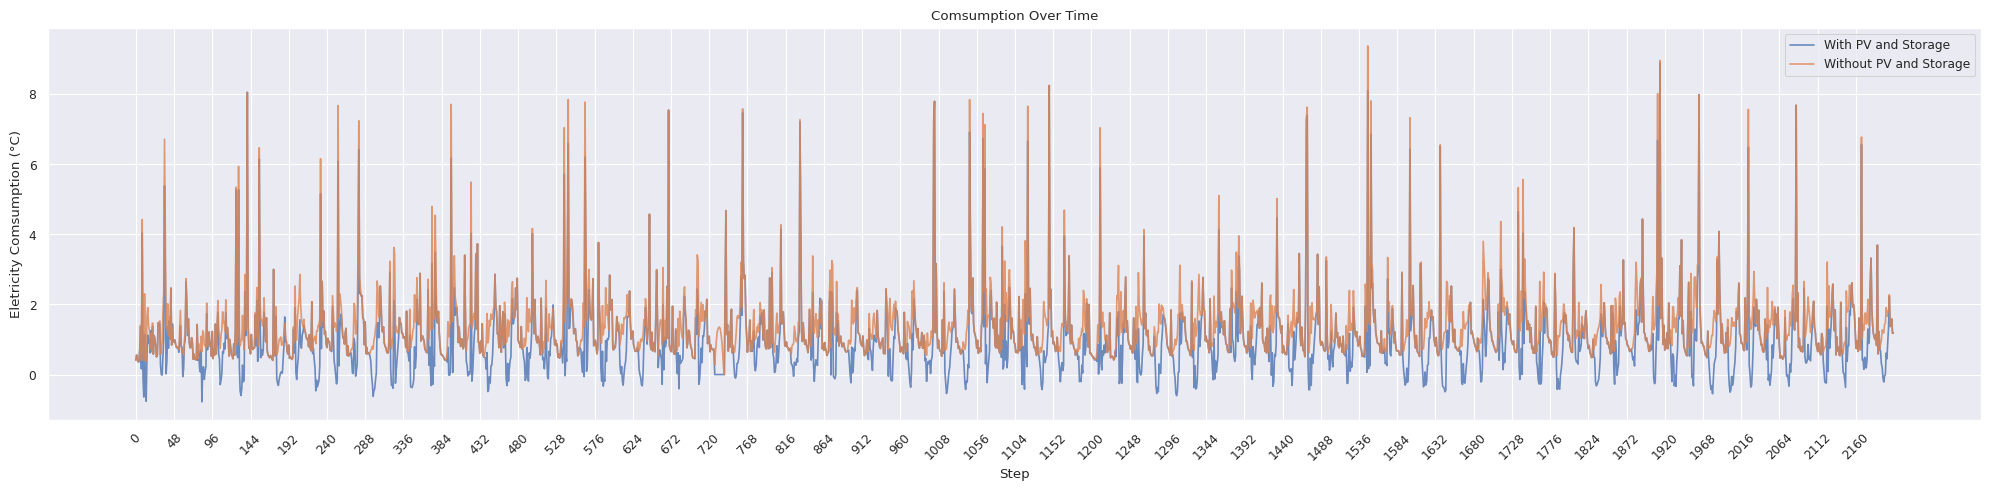

In [ ]:
energy_with_pv= eval_env.buildings[num_building].net_electricity_consumption
energy_without_pv = eval_env.buildings[num_building].net_electricity_consumption_without_storage_and_pv

plt.plot_comparison_two(
    energy_with_pv,
    energy_without_pv,
    ylabel='Eletricity Comsumption (°C)',
    title='Comsumption Over Time',
    label1='With PV and Storage',
    label2='Without PV and Storage'
)

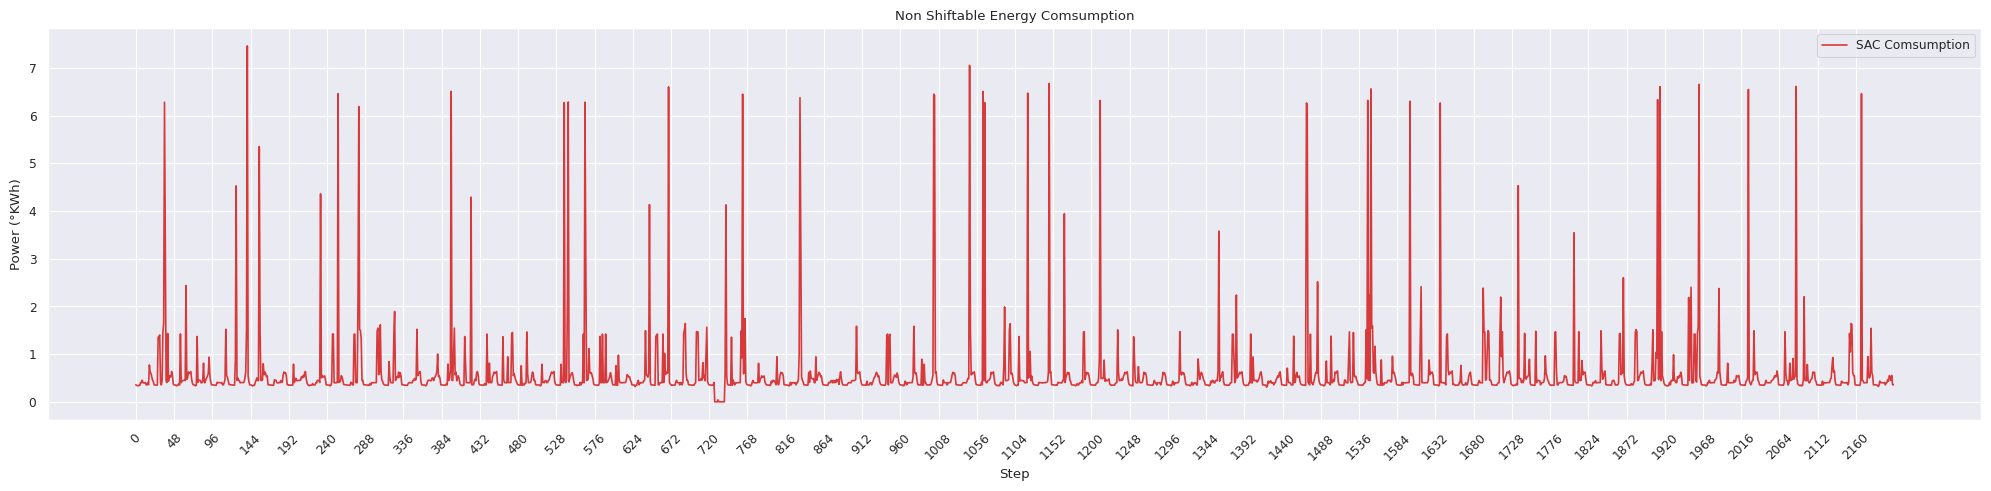

In [ ]:
non_energy = eval_env.buildings[num_building].non_shiftable_load_electricity_consumption

plt.plot_single_agent(
    non_energy,
    ylabel='Power (°KWh)',
    title='Non Shiftable Energy Comsumption',
    label='MBPO Comsumption',

)


------

## **Temperature behavior**

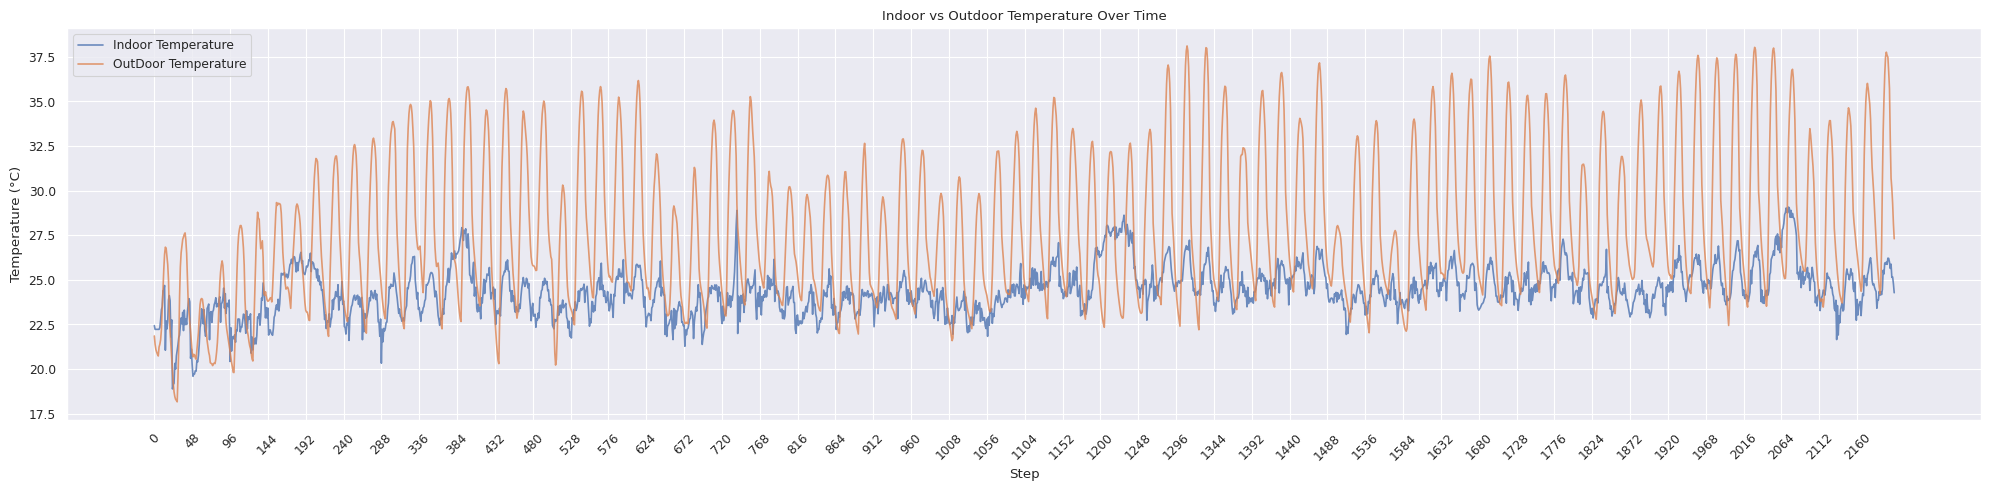

In [ ]:
indoor_base_temp = eval_env.buildings[num_building].indoor_dry_bulb_temperature
outdoor_temp = eval_env.buildings[num_building].weather.outdoor_dry_bulb_temperature

plt.plot_comparison_two(
    indoor_base_temp,
    outdoor_temp,
    ylabel='Temperature (°C)',
    title='Indoor vs Outdoor Temperature Over Time',
    label1='Indoor Temperature',
    label2='OutDoor Temperature'
)

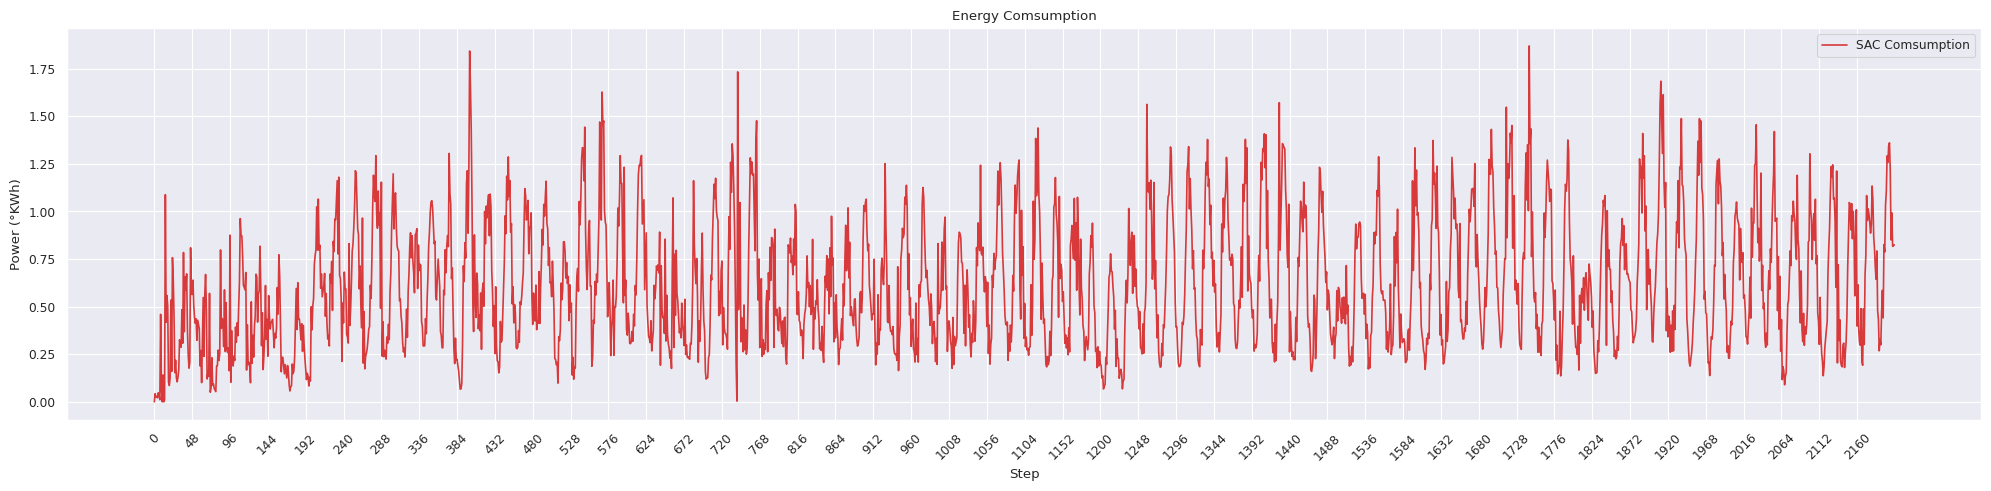

In [ ]:
cooler_energy = eval_env.buildings[num_building].cooling_electricity_consumption

plt.plot_single_agent(
    cooler_energy,
    ylabel='Power (°KWh)',
    title='Energy Comsumption',
    label='MBPO Comsumption',

)


----

## **Batteries and accumulators behavior**

In [ ]:
agent_data1 = eval_env.buildings[num_building].electrical_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='MBPO Battery Usage',
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

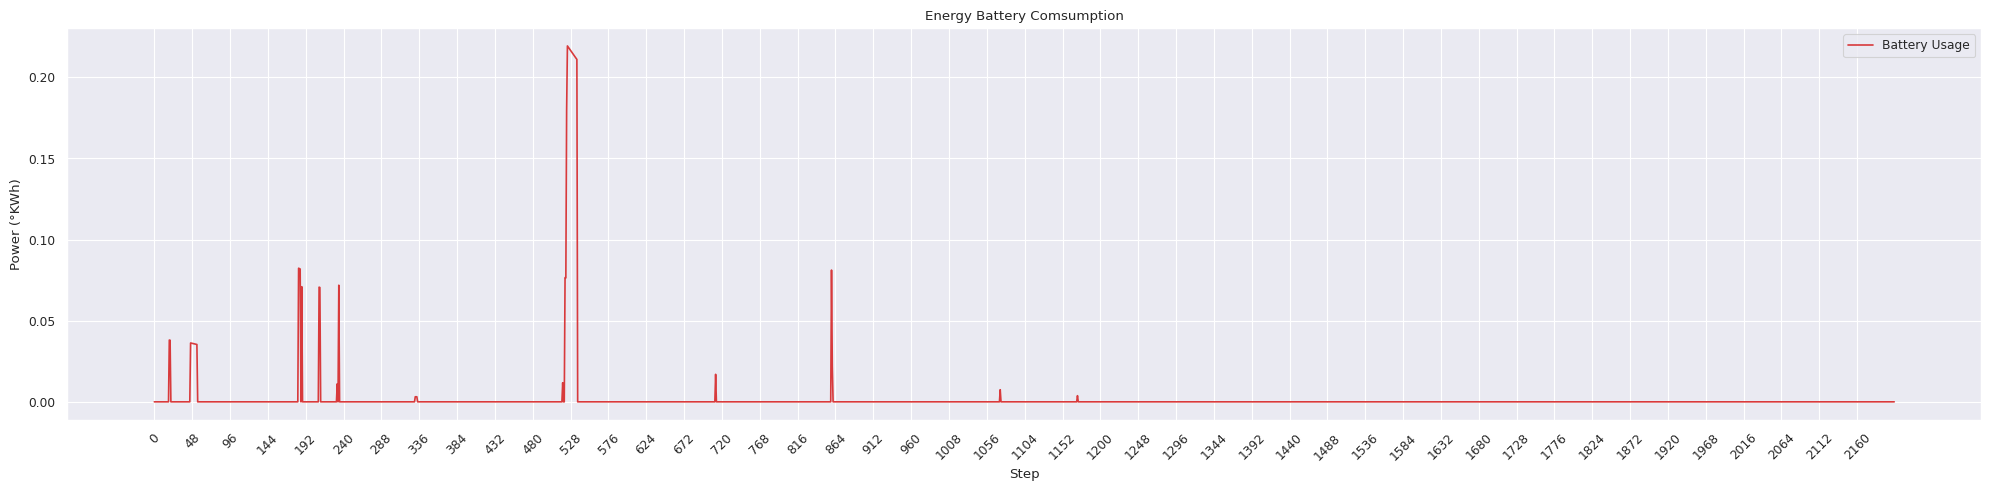

In [ ]:
agent_data1 = eval_env.buildings[num_building].dhw_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='DHW Usage'
)


----

## **Emissions behavior**


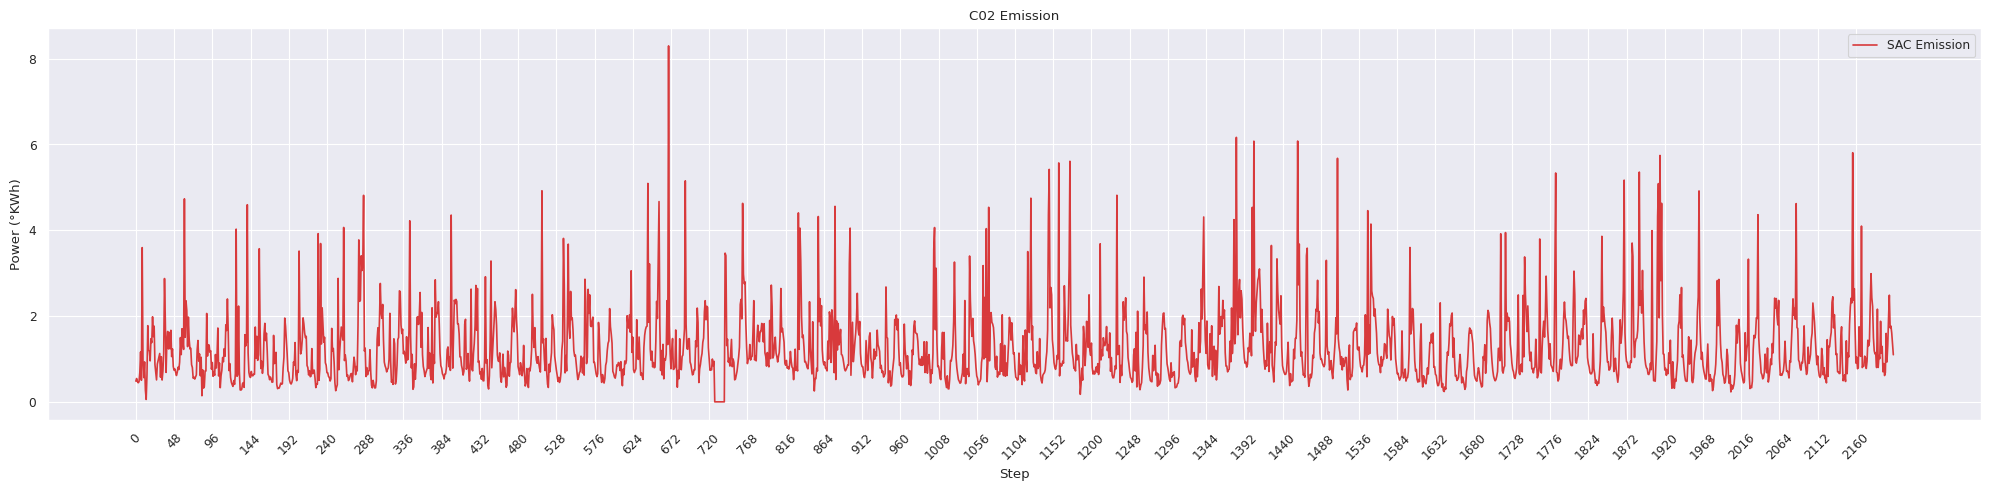

In [ ]:
agent_data1 = eval_env.net_electricity_consumption_emission

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='C02 Emission',
    label='MBPO Emission'
)

---
## **Learning metrics**


,Episodio,Reward Min,Reward Max,Reward Somma,Reward Media
0,1,-67.448830,0.00000,-28031.916016,-12.701366
1,2,-59.626198,0.00000,-26165.796875,-11.855821
2,3,-51.311554,-0.48066,-24215.154297,-10.971977
3,4,-43.668129,0.00000,-20474.738281,-9.277181
4,5,-46.273750,0.00000,-18975.503906,-8.597872
5,6,-46.356163,0.00000,-19010.890625,-8.613906
6,7,-46.132282,0.00000,-20569.160156,-9.319963
7,8,-45.613190,0.00000,-18895.730469,-8.561727
8,9,-44.909203,0.00000,-20000.748047,-9.062414
9,10,-46.579689,0.00000,-20642.792969,-9.353327


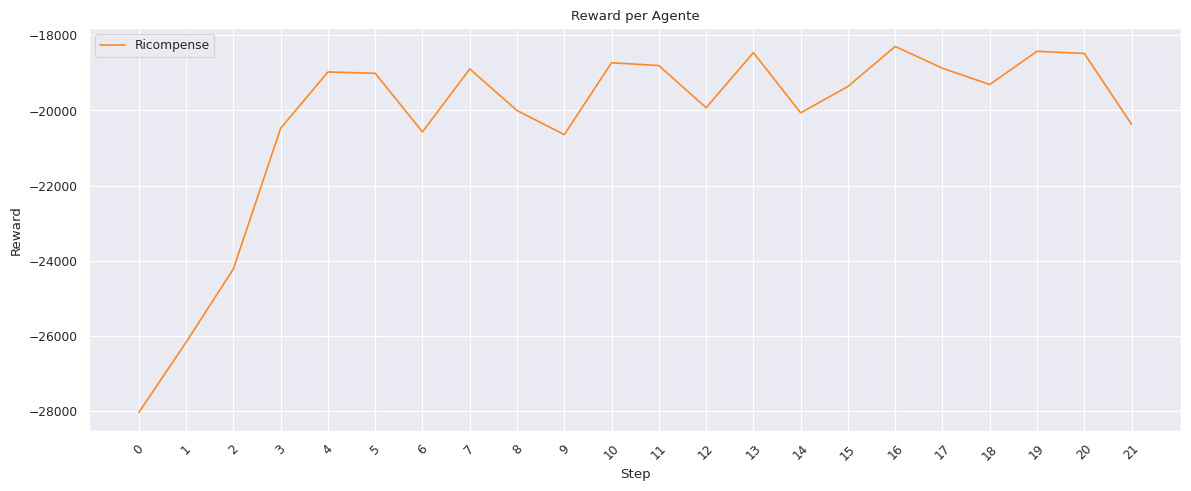

In [ ]:
df = plt.create_episode_table(eval_env.episode_rewards)

display(Markdown(f"### **MBPO - Base Version**"))
display(Markdown("----"))
display(df)

plt.plot_rewards(df['Reward Sum'])

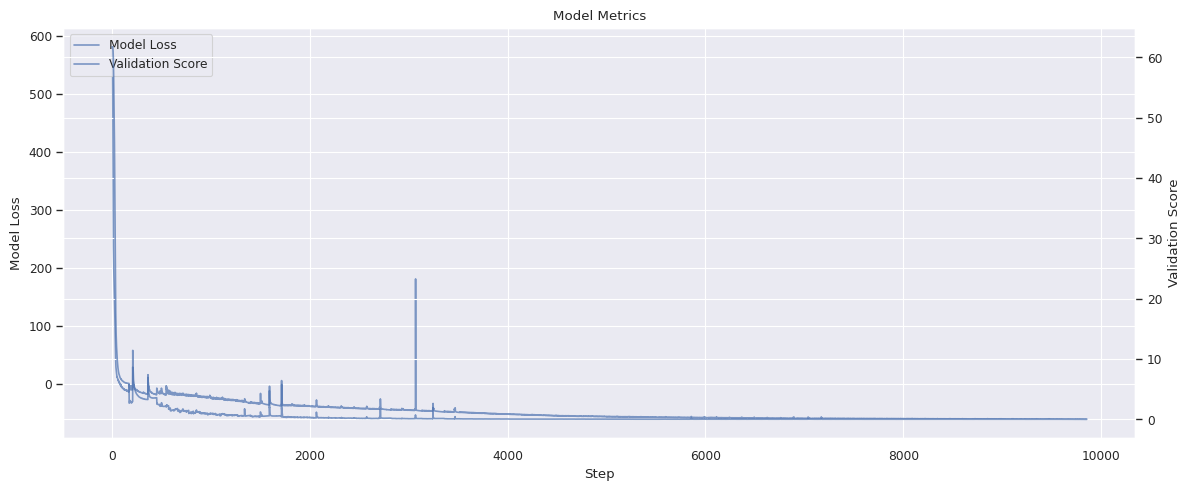

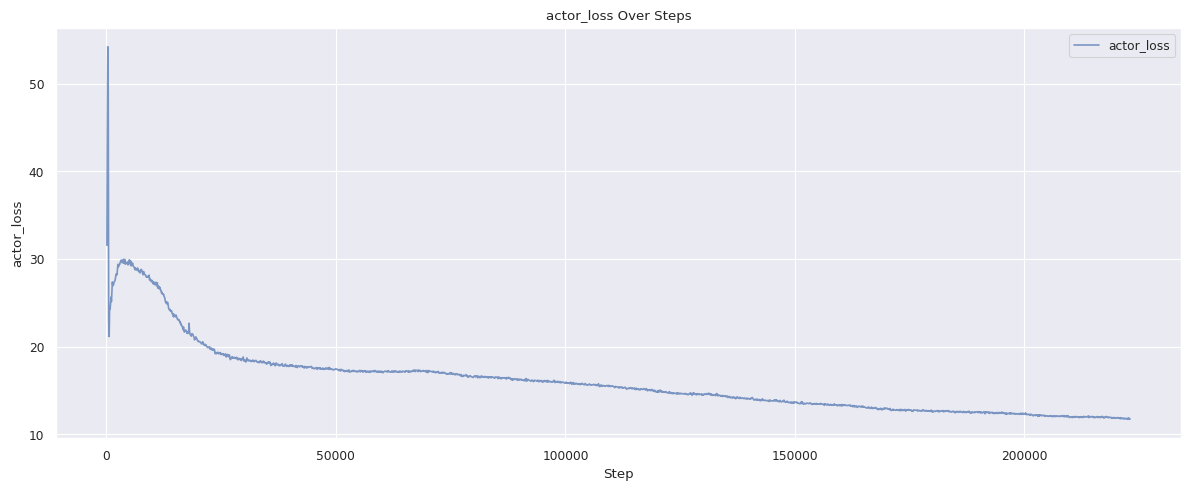

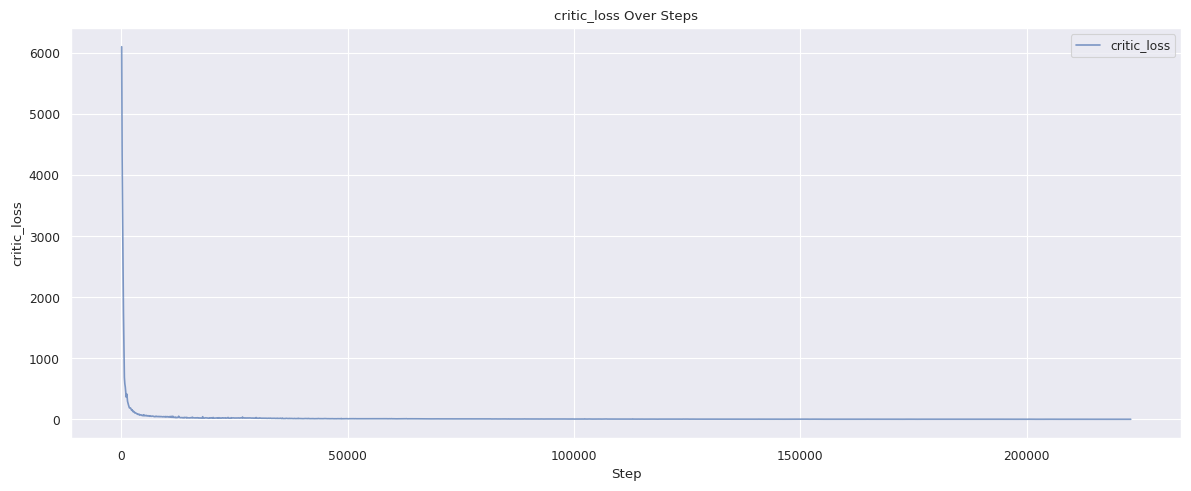

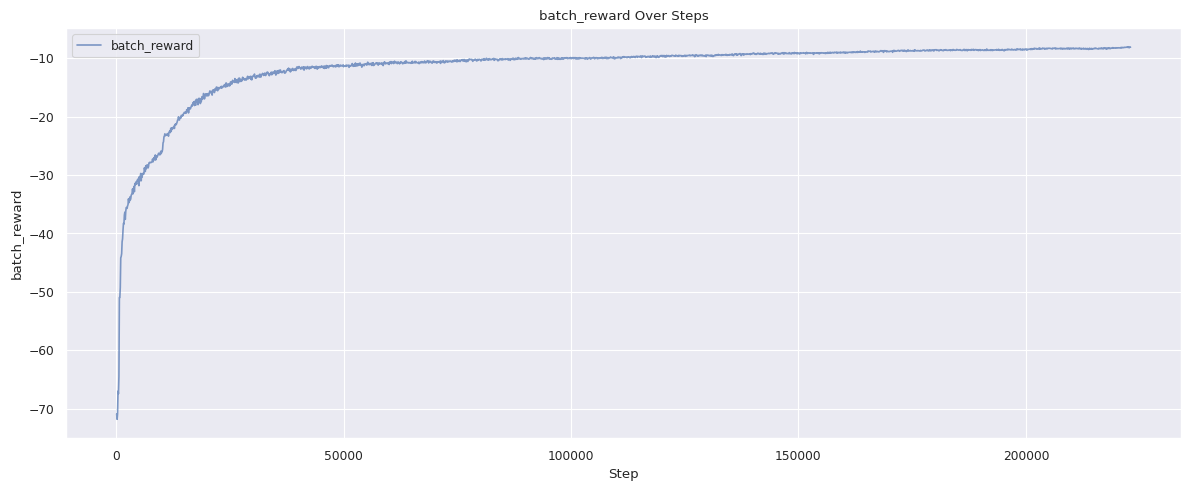

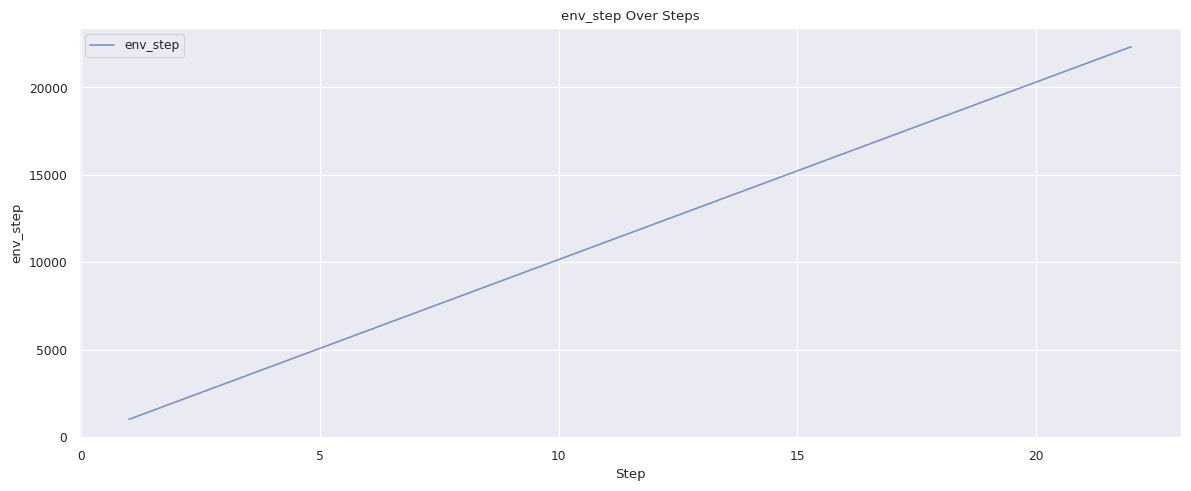

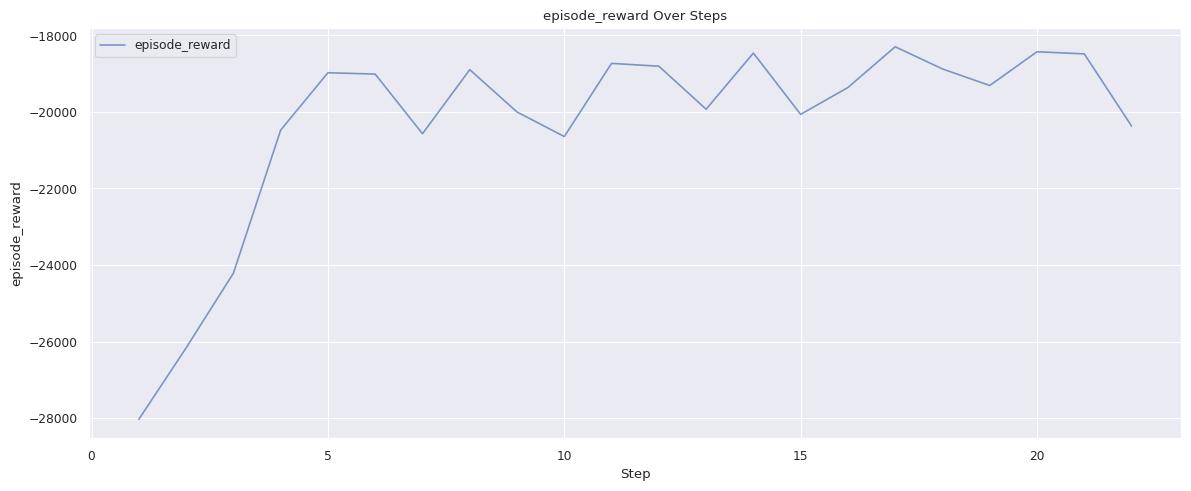

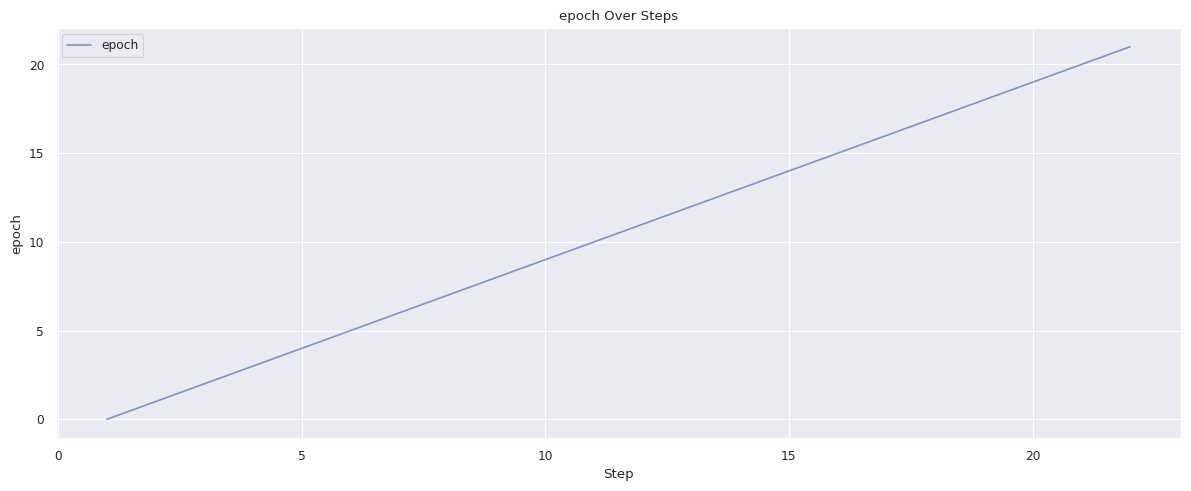

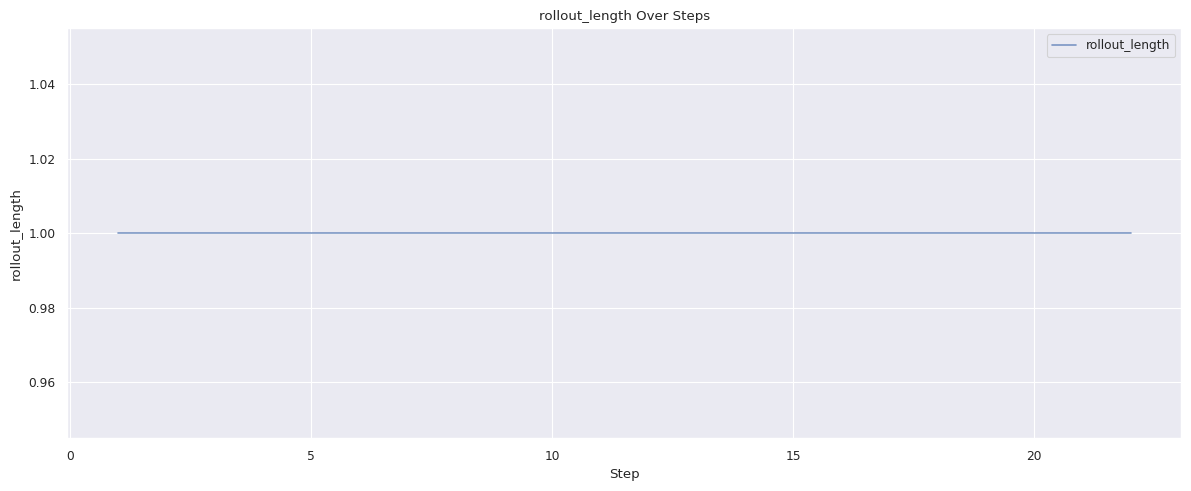

EmptyDataError: No columns to parse from file

In [ ]:
plt.plot_learning_metrics(os.getcwd()+"/exp/mbpo")